<a href="https://colab.research.google.com/github/biplobsd/ImageClassificationTest/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict:  Indian


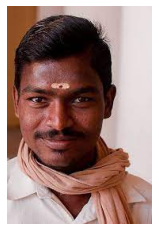

In [3]:
#@title Test Model
h5_pretrained = "imgnet" #@param ["imgnet", "resnet_v1_50"]
Image_path = "/content/download.jpg" #@param {type:"string"}

try:
  h5_pretrainedc
except:
  h5_pretrainedc = ''
  
import numpy as np
import cv2
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from IPython.display import clear_output

def prepare(filepath):
  img = cv2.imread(filepath)
  plt.axis('off')
  resized_img = cv2.resize(img,(224,224))/255
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  return resized_img.reshape(1, 224, 224, 3)

if h5_pretrained == 'imgnet':
  filePath = '/content/imgnet.h5'
  h5FileUrl = 'https://github.com/biplobsd/ImageClassificationTest/releases/download/0.0.1/imgnet.h5'
elif h5_pretrained == 'resnet_v1_50':
  filePath = '/content/resnet_v1_50.h5'
  h5FileUrl = 'https://github.com/biplobsd/ImageClassificationTest/releases/download/0.0.1/resnet_v1_50.h5'

if not h5_pretrainedc is h5_pretrained:
    try:
      model = ''
    except:
      pass
    h5_pretrainedc = h5_pretrained

if not os.path.exists(filePath):
  !wget $h5FileUrl
  clear_output()



if model == '':
  model = tf.keras.models.load_model((filePath),
  custom_objects={'KerasLayer':hub.KerasLayer})


faces_labels_dict = [
    'East Asian',
    'Indian',
    'Southeast Asian'
]

imgArray = prepare(Image_path)
prediction = model.predict(imgArray)
print('Predict: ',faces_labels_dict[np.argmax(prediction)])